In [ ]:
!nvidia-smi

Sat Jul 24 03:29:53 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import tensorflow as tf

from tensorflow.keras.layers import Reshape, Dropout, Dense,Multiply, Dot, Concatenate,Embedding

In [ ]:
tf.__version__

'2.5.0'

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
import tensorflow.keras as keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import tensorflow as tf
from keras.utils import np_utils
from keras.models import load_model
from keras.preprocessing import image
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2


In [ ]:
#@title Default title text
conv_base = InceptionV3(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

87916544/87910968 [==============================] - 0s 0us/step


**include_top : Whether you would like to create your own fully connected network and then you want to train it or you want to utilize the fully connected network which is being used inside the imagenet.**

include_top = False , means we r going to create our own fully connected layer.

In [ ]:
conv_base.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 127, 127, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 127, 127, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 127, 127, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

print(x_train.shape)
print(x_test.shape)

170508288/170498071 [==============================] - 4s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [ ]:
model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))              ## UpSampling increase the row and column of the data.Sometimes if we have less data so we can try to increase the data in this way.
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(conv_base)                             ## conv_base is the inception network.We are keeping it here.
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu' ))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

history = model.fit(x_train, y_train, steps_per_epoch=10, epochs=50, batch_size=32, validation_data=(x_test, y_test))
# history = model.fit(x_train, y_train, steps_per_epoch=50000//64, epochs=2, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/50
10/10 [==============================] - 35s 3s/step - loss: 3.0255 - acc: 0.1031 - val_loss: 31722628.0000 - val_acc: 0.1012
Epoch 2/50
10/10 [==============================] - 28s 3s/step - loss: 2.8481 - acc: 0.1219 - val_loss: 37507632.0000 - val_acc: 0.1024
Epoch 3/50
10/10 [==============================] - 44s 5s/step - loss: 2.9976 - acc: 0.0812 - val_loss: 18277692.0000 - val_acc: 0.1000
Epoch 4/50
10/10 [==============================] - 28s 3s/step - loss: 2.9356 - acc: 0.0781 - val_loss: 2116389.7500 - val_acc: 0.1000
Epoch 5/50
10/10 [==============================] - 28s 3s/step - loss: 2.7224 - acc: 0.1125 - val_loss: 42917.0547 - val_acc: 0.1000
Epoch 6/50
10/10 [==============================] - 28s 3s/step - loss: 2.8841 - acc: 0.1156 - val_loss: 80.6463 - val_acc: 0.1257
Epoch 7/50
10/10 [==============================] - 28s 3s/step - loss: 2.8130 - acc: 0.1094 - val_loss: 2.3376 - val_acc: 0.1356
Epoch 8/50
10/10 [==============================] - 28s 3s

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
up_sampling2d_3 (UpSampling2 (None, 64, 64, 3)         0         
_________________________________________________________________
up_sampling2d_4 (UpSampling2 (None, 128, 128, 3)       0         
_________________________________________________________________
up_sampling2d_5 (UpSampling2 (None, 256, 256, 3)       0         
_________________________________________________________________
inception_v3 (Functional)    (None, 6, 6, 2048)        21802784  
_________________________________________________________________
flatten_1 (Flatten)          (None, 73728)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               9437312   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [ ]:

'''history = model.fit(train_data_gen,
                  
                    steps_per_epoch=total_train // batch_size,
                    epochs=epochs,
                    validation_data=val_data_gen,
                    validation_steps=total_val // batch_size)'''

'history = model.fit(train_data_gen,\n                  \n                    steps_per_epoch=total_train // batch_size,\n                    epochs=epochs,\n                    validation_data=val_data_gen,\n                    validation_steps=total_val // batch_size)'

In [ ]:
#model = tf.keras.models.load_model('my_model.h5')
model.save("cifar_model.h5")

In [ ]:
model1 = tf.keras.models.load_model("cifar_model.h5")

# New Section

In [ ]:
model1.predict_classes

<bound method Sequential.predict_classes of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7fd2e85beac8>>

In [ ]:
model1.name

'sequential_1'

Input Dimensions - Image :  (500, 500, 3)


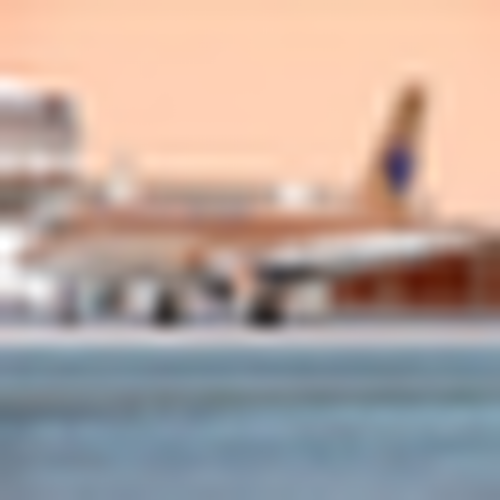

In [ ]:
from matplotlib.pyplot import imshow
import cv2
from google.colab.patches import cv2_imshow
from skimage import io

input_img= "http://www.cs.toronto.edu/~kriz/cifar-10-sample/airplane1.png"

input_img = io.imread(input_img)
input_img = cv2.resize(input_img, dsize=(500, 500), interpolation=cv2.INTER_CUBIC)
print('Input Dimensions - Image : ',input_img.shape)
cv2_imshow(input_img)

In [ ]:
  import numpy as np
  from keras.preprocessing import image
  input_img = cv2.resize(input_img, dsize=(32, 32), interpolation=cv2.INTER_CUBIC)
  x = image.img_to_array(input_img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  preds = model1.predict(x)
  class_idx = np.argmax(preds[0])
  preds[0],class_idx

(array([0.03881406, 0.02468418, 0.01690811, 0.28462264, 0.00874881,
        0.05412495, 0.00395321, 0.06887385, 0.4906739 , 0.00859637],
       dtype=float32), 8)